In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
basename = "/mnt/c/Users/guido/data/olympic-ranking-170dd62c8ed8b308d7107a0cd69db75f/result-"

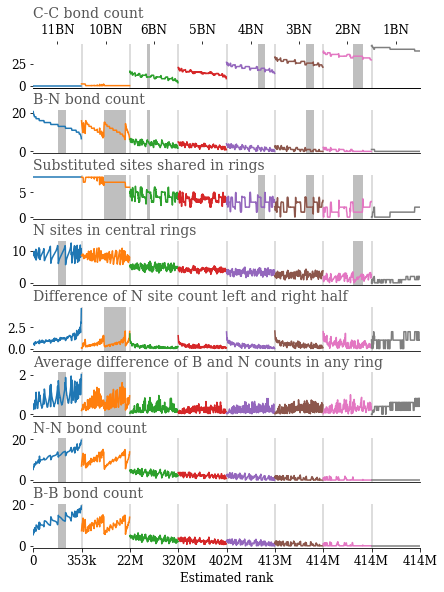

In [18]:
# CC CN CB NN BN BB, innerN innerB, ring0--5 
#                    6 7  (8 9)-(10-11)__(12-13)__(14-15)-(16-17) 
def figure():
    plt.rc('font', family='serif', size=12)
    nplots = 8
    f, axs = plt.subplots(nplots,1, figsize=(6,8), sharex=False)
    
    counts = []
    results = []
    segments = "03 06 09 12 15 18 30 33".split()[::-1]
    lookupcounts = (0, 231, 22000, 746130, 11192940, 81477396, 298755072, 548725320, 480140430, 177827650, 21340704, 352716)
    
    labels = [0]
    for segment in segments:
        bncount = float(segment.lstrip("0"))//3
        #labels.append(labels[-1] + lookupcounts[int(bncount)])
        counts.append(np.loadtxt(f'{basename}{segment}.counts'))
        results.append(np.loadtxt(f'{basename}{segment}.description'))
        labels.append(int(sum(counts[-1])) + labels[-1])
    
    counts = np.hstack(counts)
    results = np.vstack(results)
    
    # vlines and labels
    for plot in range(nplots):
        for segment_id in range(1, len(segments)):
            axs[plot].axvline(200*segment_id, color="lightgrey")
        axs[plot].set_xlim(0, 200*len(segments))
        #axs[plot].set_yticks([])
        axs[plot].set_xticks([])
        axs[plot].spines['right'].set_visible(False)
        axs[plot].spines['top'].set_visible(False)
        axs[plot].spines['left'].set_visible(False)
    
    # content
    def plot_into(prop, axs):
        for sid in range(len(segments)):
            axs.plot(range(sid*200, (sid+1)*200), prop[sid*200: (sid+1)*200])
    plot_into(results[:, 0] / counts, axs[0]) # CC counts
    plot_into(results[:, 4] / counts, axs[1])# BN counts
    plot_into(results[:, 3] / counts, axs[6])# NN counts
    plot_into(results[:, 5] / counts, axs[7])# BB counts
    plot_into(results[:, [6,7]].sum(axis=1) / counts, axs[2]) # inner bn substituted, see field (2,2 and 3,2)
    plot_into(results[:, [10,12,14]].sum(axis=1) / counts, axs[3]) # each group of BN bond counts ordered by N in minority rings see field (2,1 and 4,1)
    plot_into(abs(results[:, [8,10]].sum(axis=1)-results[:, [14,16]].sum(axis=1)) / counts, axs[4]) # balanced distribution of N more stable for fully substuted cases, imbalanaced more stable for partial cases
    
    q = abs(results[:, [12,]].sum(axis=1)-results[:, [13,]].sum(axis=1))
    q += abs(results[:, [10,]].sum(axis=1)-results[:, [11,]].sum(axis=1))
    q += abs(results[:, [8,]].sum(axis=1)-results[:, [9,]].sum(axis=1))
    q += abs(results[:, [14,]].sum(axis=1)-results[:, [15,]].sum(axis=1))
    q += abs(results[:, [16,]].sum(axis=1)-results[:, [17,]].sum(axis=1))
    plot_into(q / counts/5, axs[5]) # BN-balanced rings more stable
    
    # labels
    topax = axs[0].twiny()
    topax.set_xlim(0, 200*len(segments))
    topax.set_xticks([_*200+100 for _ in range(len(segments))])
    topax.set_xticklabels([f'{int(_.lstrip("0"))//3}BN' for _ in segments])
    
    topax.spines['right'].set_visible(False)
    topax.spines['top'].set_visible(False)
    topax.spines['left'].set_visible(False)
    axs[nplots-1].set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600))
    axs[nplots-1].set_xlabel("Estimated rank")
    #axs[nplots-1].set_xticklabels(("0", "231", "22k", "768k", "12M", "93M"))
    axs[nplots-1].set_xticklabels([humanize(_) for _ in labels])
    #axs[3].set_ylabel("              Average value per molecule")
    
    # property labels
    titles = ["C-C bond count", "B-N bond count", "Substituted sites shared in rings", "N sites in central rings", "Difference of N site count left and right half", "Average difference of B and N counts in any ring", "N-N bond count", "B-B bond count", ]
    for panelidx, title in enumerate(titles):
        axs[panelidx].set_title(title, color='#555555', loc='left', size=14)
    
    # inset
    left, bottom, width, height = [0.63, 0.70, 0.36, 0.15]
    #insetax = f.add_axes([left, bottom, width, height])
    #insetax.set_xticks([])
    #insetax.set_yticks([])
    
    # highlighter
    axs[1].axvspan(103, 135, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[3].axvspan(103, 135, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[5].axvspan(103, 135, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[6].axvspan(103, 135, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[7].axvspan(103, 135, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    
    axs[1].axvspan(293, 385, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[2].axvspan(293, 385, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[4].axvspan(293, 385, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[5].axvspan(293, 385, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    
    axs[0].axvspan(470, 485, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[1].axvspan(470, 485, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[2].axvspan(470, 485, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    
    axs[0].axvspan(930, 960, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[2].axvspan(930, 960, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    
    axs[0].axvspan(200+930, 200+960, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[2].axvspan(200+930, 200+960, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[1].axvspan(200+930, 200+960, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    
    axs[0].axvspan(200+1125, 200+1165, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[2].axvspan(200+1125, 200+1165, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    axs[3].axvspan(200+1125, 200+1165, facecolor='grey', alpha=0.5, zorder=-10, edgecolor='none')
    
    # layout
    plt.subplots_adjust(top=0.935, right=0.955, bottom=0.06, left=0.06, wspace=0,hspace=0.5)
    width = 3.5
    height = width / 1.#618
    #f.set_size_inches(width, height)
    f.savefig('patterns.pdf')
figure()

In [5]:
def humanize(number):
    number = int(number)
    groups = len(str(number))//3
    if number < 10**(3*groups):
        groups -=1
    groups = max(0, groups)
    
    suffix = ['', 'k', 'M']
    
    
    return str(int(np.round(number / (10**(3*groups))))) + suffix[groups]
humanize(100), humanize(1400), humanize(1500)

('100', '1k', '2k')

/home/guido/miniconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


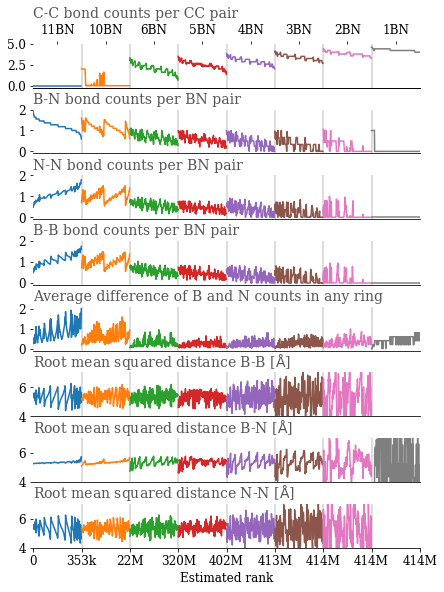

In [74]:
# CC CN CB NN BN BB, innerN innerB, ring0--5 
#                    6 7  (8 9)-(10-11)__(12-13)__(14-15)-(16-17) 
def figure():
    plt.rc('font', family='serif', size=12)
    nplots = 8
    #f, axs = plt.subplots(nplots,1, figsize=(6,8), sharex=False)
    gs_kw = dict(width_ratios=[1,], height_ratios=[1,1,1,1,1,1,1,1])
    f, axs = plt.subplots(ncols=1, nrows=nplots, constrained_layout=True, gridspec_kw=gs_kw, figsize=(6,8))
    
    counts = []
    rmsds = []
    results = []
    segments = "03 06 09 12 15 18 30 33".split()[::-1]
    lookupcounts = (0, 231, 22000, 746130, 11192940, 81477396, 298755072, 548725320, 480140430, 177827650, 21340704, 352716)
    
    labels = [0]
    for segment in segments:
        bncount = float(segment.lstrip("0"))//3
        #labels.append(labels[-1] + lookupcounts[int(bncount)])
        counts.append(np.loadtxt(f'{basename}{segment}.counts'))
        rmsds.append(np.loadtxt(f'{basename}{segment}.rmsd'))
        results.append(np.loadtxt(f'{basename}{segment}.description'))
        labels.append(int(sum(counts[-1])) + labels[-1])
    
    counts = np.hstack(counts)
    results = np.vstack(results)
    rmsds = np.vstack(rmsds)
    
    # vlines and labels
    for plot in range(nplots):
        for segment_id in range(1, len(segments)):
            axs[plot].axvline(200*segment_id, color="lightgrey")
        axs[plot].set_xlim(0, 200*len(segments))
        #axs[plot].set_yticks([])
        axs[plot].set_xticks([])
        axs[plot].spines['right'].set_visible(False)
        axs[plot].spines['top'].set_visible(False)
        axs[plot].spines['left'].set_visible(False)
    
    # content
    def plot_into(prop, axs, scale=False):
        if scale == False:
            nbns = (1,1,1,1,1,1,1,1)
        if scale == True:
            nbns = (11,10,6,5,4,3,2,1)
        if scale == "inv":
            nbns = (1,1,5,6,7,8,9,10)
        for sid in range(len(segments)):
            axs.plot(range(sid*200, (sid+1)*200), prop[sid*200: (sid+1)*200] / nbns[sid], color=f'C{sid}')
    plot_into(results[:, 0] / counts, axs[0], scale="inv") # CC counts
    plot_into(results[:, 4] / counts, axs[1], scale=True)# BN counts
    plot_into(results[:, 3] / counts, axs[2], scale=True)# NN counts
    plot_into(results[:, 5] / counts, axs[3], scale=True)# BB counts
    
    q = abs(results[:, [12,]].sum(axis=1)-results[:, [13,]].sum(axis=1))
    q += abs(results[:, [10,]].sum(axis=1)-results[:, [11,]].sum(axis=1))
    q += abs(results[:, [8,]].sum(axis=1)-results[:, [9,]].sum(axis=1))
    q += abs(results[:, [14,]].sum(axis=1)-results[:, [15,]].sum(axis=1))
    q += abs(results[:, [16,]].sum(axis=1)-results[:, [17,]].sum(axis=1))
    plot_into(q / counts/5, axs[4]) # BN-balanced rings more stable
    
    plot_into(np.sqrt(rmsds[:, 0]), axs[5])
    plot_into(np.sqrt(rmsds[:, 1]), axs[6])
    plot_into(np.sqrt(rmsds[:, 2]), axs[7])
    axs[5].set_ylim(4,7)
    axs[6].set_ylim(4,7)
    axs[7].set_ylim(4,7)
    
    # labels
    topax = axs[0].twiny()
    topax.set_xlim(0, 200*len(segments))
    topax.set_xticks([_*200+100 for _ in range(len(segments))])
    topax.set_xticklabels([f'{int(_.lstrip("0"))//3}BN' for _ in segments])
    
    topax.spines['right'].set_visible(False)
    topax.spines['top'].set_visible(False)
    topax.spines['left'].set_visible(False)
    axs[nplots-1].set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600))
    axs[nplots-1].set_xlabel("Estimated rank")
    #axs[nplots-1].set_xticklabels(("0", "231", "22k", "768k", "12M", "93M"))
    axs[nplots-1].set_xticklabels([humanize(_) for _ in labels])
    #axs[3].set_ylabel("              Average value per molecule")
    
    # property labels
    titles = ["C-C bond counts per CC pair", "B-N bond counts per BN pair", "N-N bond counts per BN pair", "B-B bond counts per BN pair", "Average difference of B and N counts in any ring", "Root mean squared distance B-B [$\mathrm{\AA}$]", "Root mean squared distance B-N [$\mathrm{\AA}$]", "Root mean squared distance N-N [$\mathrm{\AA}$]"]
    for panelidx, title in enumerate(titles):
        axs[panelidx].set_title(title, color='#555555', loc='left', size=14)
    
    # ticks
    #axs[0].set_ylim(0, 5)
    axs[0].set_yticks((0, 2.5, 5))
    for i in range(1, 5):
        axs[i].set_yticks((0, 1, 2))
    #axs[5].set_yticks((20, 30, 40))
    #axs[7].set_yticks((20, 30, 40))
    # layout
    plt.subplots_adjust(top=0.935, right=0.955, bottom=0.06, left=0.06, wspace=0,hspace=0.5)
    width = 3.5
    height = width / 1.#618
    #f.set_size_inches(width, height)
    f.savefig('patterns-main.pdf')
figure()